In [16]:
#JSS
import cv2
import numpy as np
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [17]:
# send the path to the image directory and get the path to all the images in it
def image_directory_parser(path, viewer=True, number= 4):    
    globs=['*.jpg', '*.png', '*.jpeg', '*.JPG', '*.PNG']
    ## can also use sufix instead of with method
    image_path = []
    for g in globs:
        image_path += list(path.glob("**/"+g))
    print(len(image_path))
    if viewer:
        nrows = number
        ncols = number
        fig = plt.gcf()
        fig.set_size_inches(ncols*4, ncols*4)
        for i in range(2*number):
            sp = plt.subplot(nrows, ncols, i + 1)
            sp.axis('Off') # Don't show axes (or gridlines)
            img = mpimg.imread((image_path[i]))
            plt.imshow(img)
        plt.show()
    return image_path

In [18]:
# Takes the input as the original image, image_to_be_added, the position where it is to be added,
# and if the shape of the image to be added should be changed and its scale factor
# send in RGB image and get RGB image
def image_adder(image_original, image_add, position= [0,0], reshape= False, scale=1):
    if reshape:
        width = int(image_add.shape[1]*scale)
        height = int(image_add.shape[0]*scale)
        dim= (width, height)
        # resize image
        image_add = cv2.resize(image_add, dim, interpolation = cv2.INTER_AREA)
    rows,cols,channels = image_add.shape
    roi = image_original[position[0]:position[0]+rows, position[1]:position[1]+cols ]
    image_add2gray = cv2.cvtColor(image_add,cv2.COLOR_RGB2GRAY)
    ret, mask = cv2.threshold(image_add2gray, 10, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)

    # Now black-out the area of logo in ROI
    img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
    # Take only region of logo from logo image.
    img2_fg = cv2.bitwise_and(image_add,image_add,mask = mask)
    
    # Put logo in ROI and modify the main image
    dst = cv2.add(img1_bg,img2_fg)
    image_original[position[0]:position[0]+rows, position[1]:position[1]+cols ] = dst
    return image_original

In [19]:
path_to_image = Path("/home/Hierarchical-Localization/datasets/Trajectory3/UsefulImagesT3")

1637


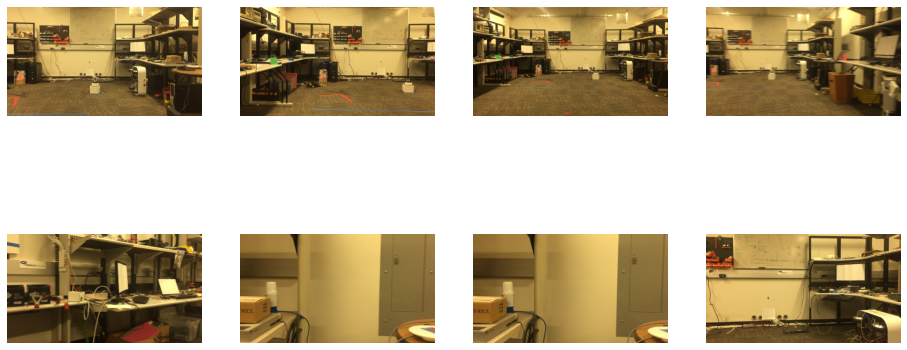

In [20]:
image_path_list = image_directory_parser(path_to_image)

In [27]:
def add_and_save(path, image_path_list):
    image_add = cv2.imread("coat.png")
    image_add = cv2.cvtColor(image_add, cv2.COLOR_BGR2RGB)
#     image_add = cv2.resize(image_add,(360,400), interpolation = cv2.INTER_AREA)
#     print(image_add.shape)

    for i in image_path_list:
        image_original = cv2.imread(str(i))
#         print(image_original.shape)
        image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2RGB)
        image_return = image_adder(image_original, image_add, position= [0,0], reshape= False, scale=0.35)
    
#         image_return = image_adder(image_return, image_add, position= [150,0], reshape= False, scale=0.35)
        name = i.name
        cv2.imwrite(str(path/name),cv2.cvtColor(image_return, cv2.COLOR_RGB2BGR))

In [30]:
p = Path("/home/Hierarchical-Localization/datasets/Trajectory3/Image_added_scale_twice")
# p.mkdir()

In [31]:
add_and_save(p, image_path_list)

error: OpenCV(4.5.1) /tmp/pip-req-build-1syr35c1/opencv/modules/core/src/arithm.cpp:250: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'binary_op'
